<div id="instructions" style="border-radius: 5px; background-color:#f5f5f5;" >
<h1>Instructions</h1>
<p>Look for the <b>3 Your Turn</b> sections to complete the code and/or answer questions.<p>
</div>

# Introduction to Bayes Models


## Introduction

Modern Bayesian models are in the class of compuationally intensive models. Bayesian models are a rich class of models, which can provide attractive alternatives to frequentist models. 


## Brief history

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/ThomasBayes.gif" style="float:left; padding-right: 10px; height: 100px;" title="Thomas Bayes" />A restricted version of Bayes Theorem was proposed by Rev.Thomas Bayes (1702-1761). Bayes Theorem, was published postumously by his friend Richard Price. Bayes' interest was in probabilities of gambling games. He was also a supporter of Issac Newton's new theory of calculus, with his publication, *An Introduction to the Doctrine of Fluxions, and a Defence of the Mathematicians Against the Objections of the Author of The Analyst*.

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/Laplace.jpg" style="float:right; padding-left: 10px; height: 120px;" title="Pierre-Simon Laplace" />


Pierre-Simon Laplace published a version of Bayes Theorem, similar to its modern form, in his *Essai philosophique sur les probabilités* 1814. Laplace applied Bayesian methods to problems in celestial mechanics. These problems had great practical implications in the late 18th and early 19th centuries for the safe navigation of ships. 
 
<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/JeffreysProbability.jpg" style="float: left; padding: 10px; height: 120px;" title="Jeffery's 1939 Probability book" />
The geophysicist and mathematician Harold Jefferys extensively used Bayes' methods. His 1939 book, *The Theory of Probability* was in deliberate opposition to Fisher's methods using p-values.



Despite the philosophical squables, Bayesian methods endured and showed an increasing number of success stories. Pragmatists continued to use both approaches. A number of successes during the Second World War, with the philosophical battles raging, included:

- Bayesian models were used to improve artillery accuracy in both world wars. In particular the Soviet statistian Kolmagorov used Bayes methods to greatly improve artillery accuracy. 
- Bayesian models were used by Alan Turing to break German codes.
- Bernard Koopman, working for the British Royal Navy, improved the ability to locate U-boats using directional data from intercepted radio transmissions. 


Starting in the second half of the 20th century the convergance of greater computing power and general acceptance lead to the following notable advances in computational Bayesian methods.

- Statistical sampling using Monte Carlo methods; Stanislaw Ulam, John von Neuman; 1946, 1947
- MCMC, or Markov Chain Monte Carlo; Metropolis et al. (1953) Journal of Chemical Physics
- Hastings (1970), Monte Carlo sampling methods using Markov chains and their application
- Geman and Geman (1984) Stochastic relaxation, Gibbs distributions and the Bayesian restoration of images
- Duane, Kennedy, Pendleton, and Roweth (1987),  Hamiltonian MCMC
- Gelfand and Smith (1990), Sampling-based approaches to calculating marginal densities.



## Bayesian vs. Frequentist Views

The battle between Fisher, Jefferys and their protégés continued for most of the 20th century. This battle was bitter and often personal. The core of these argument were:

- Fisher argued that the selection of a Bayesian prior distribution was purely subjective, allowing one to achieve any answer desired.
- Jefferys argued that all knowledge is in fact subjective, and that choosing a confidence interval was subjective in any event.

With greater computational power and general acceptance, Bayes methods are now widely used in areas ranging from medical research to natural language understanding to web search. Amoung pragmatists, the common belief today is that some problems are better handled by Frequentist methods and some with Bayesian methods.

Let's summarize the differences between the Bayesian and Frequentist views. 

- Bayesian methods use priors to quantify what we know about parameters.
- Frequentists do not quantify anything about the parameters, using p-values and confidence intervals to express the unknowns about parameters.

Recalling that both views are useful, we can contrast these methods with a chart.

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/FrequentistBayes.jpg" title="Frequentists versus Bayes" style="height: 500px;">



## References

### Some introductory texts

These two books provide a broad and readable introduction to Bayesian data analysis. Well, sort of. Both books contain extensive examples using R and specialized Bayes packages.

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/StatisticalRethinking.jpg" style="display: inline; height: 200px; margin: 5px;" title="Statistical Rethinking" /> <img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/DoingBaysianDataAnalysis.jpg" style="display: inline; height: 200px; margin: 5px;" title="Doing Bayesian Data Analysis" />



### Modeling reference
<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/BayesRegression.jpg" style="height: 200px; float: left; padding-right: 10px;" title="Data Analysis using Regression and Multilevel Hierarchical Models" />
This book contains a comprehensive treatment of applying Bayesian models. The level of treatments in intermediate. The examples are from the social sciences, but the methods can be applied more widely. The examples use R and specialized Bayes packages. 
<div style="clear: both;"></div>

### Theory 
<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/BaysianDataAnalysis.jpg" style="height: 200px; float: left; padding-right: 10px;" title="Bayesian Data Analysis" />
This book contains a comprehensive overview of the modern theory of Bayesian models. The book is at an advanced level. Only theory is addressed, which only very limited R code examples.  



## Bayes Theorem

Let's go through a simple derivation of Bayes' theorem. Remember the rule for conditional probability:

$$P(A|B) = \frac{P(A \cap B)}{p(B)}\\
and\\
P(B|A) = \frac{P(A \cap B)}{p(A)}$$

Eliminating $P(A \cap B):$

$$ P(B)P(A|B) = P(A)P(B|A) $$

$$ Or\\ $$

$$ P(A|B) = \frac{P(A)P(B|A)}{P(B)}$$


Which is Bayes' Theorem!

### Example, probabilities of eye and hair color

A sample population has the following probabilities of eye and hair color combinations. Execute the code to see the chart of conditional probabilities.

In [1]:
import pandas
import numpy
import matplotlib
from matplotlib import pyplot
import seaborn
import scipy
import itertools

%matplotlib inline

In [2]:
eye_hair = pandas.DataFrame({
    'black': [0.11, 0.03, 0.03, 0.01], 
    'brunette': [0.2, 0.14, 0.09, 0.05],
    'red': [0.04, 0.03, 0.02, 0.02],
    'blond': [0.01, 0.16, 0.02, 0.03],
}, index=['brown', 'blue', 'hazel', 'green'])

eye_hair

,black,blond,brunette,red
brown,0.11,0.01,0.20,0.04
blue,0.03,0.16,0.14,0.03
hazel,0.03,0.02,0.09,0.02
green,0.01,0.03,0.05,0.02


Note: here we're using a string index for eye color rather than a numeric zero-based index. So to access a given (eye, hair) color value, index the dataframe like so:

In [3]:
eye_hair.loc['hazel', 'red']

0.02

The figure in the table above are the **conditional probabilities**. Note that in the case: 

$$P(hair | eye) = P(eye | hair)$$ 

Given these conditional probabilities, it is easy to compute the marginal probabilities by summing the probabilities in the rows and columns. The **Marginal probability** is the probability along one variable (one margin) of the distribution. For example, $P(Red)$ or $P(Green)$. Like all probability distributions, marginal distributions must sum to 1.0. 

The code in the cell below computes the marginal probabilities by both hair color and eye color. Execute this code and examine the result.

In [4]:
## Compute the marginal distribution of each eye color
eye_hair['marginal_eye'] = eye_hair.sum(axis=1)
eye_hair

,black,blond,brunette,red,marginal_eye
brown,0.11,0.01,0.20,0.04,0.36
blue,0.03,0.16,0.14,0.03,0.36
hazel,0.03,0.02,0.09,0.02,0.16
green,0.01,0.03,0.05,0.02,0.11


In [5]:
eye_hair.sum(axis=0)

black           0.18
blond           0.22
brunette        0.48
red             0.11
marginal_eye    0.99
dtype: float64

In [6]:
eye_hair.loc['marginal_hair'] = eye_hair.sum(axis=0)
eye_hair

,black,blond,brunette,red,marginal_eye
brown,0.11,0.01,0.20,0.04,0.36
blue,0.03,0.16,0.14,0.03,0.36
hazel,0.03,0.02,0.09,0.02,0.16
green,0.01,0.03,0.05,0.02,0.11
marginal_hair,0.18,0.22,0.48,0.11,0.99


## Your Turn 1
Use Bayes Theorem to compute the probability of each hair color given that the subject has blue eyes; 
$$P(Hair\ Color|Blue\ Eyes)$$ 
Hint, this is a bit tricky since $P(hair\ color) = 1$ across all colors. 

<div style="background-color: lightyellow; border-radius: 10px;">
**Bayes Theorem**:
$$ P(A|B) = \frac{P(A)P(B|A)}{P(B)}$$
You've got the probabilities listed in the table above.
</div>

In [7]:
# probability of blue eyes given any hair color divided by total probablity of blue eyes
eye_hair.loc['blue',:]/sum(eye_hair.loc['blue',:])

black           0.041667
blond           0.222222
brunette        0.194444
red             0.041667
marginal_eye    0.500000
Name: blue, dtype: float64

In [8]:
eye_hair.loc['blue',:]

black           0.03
blond           0.16
brunette        0.14
red             0.03
marginal_eye    0.36
Name: blue, dtype: float64

## Applying Bayes Theorm

We need a formulation of Bayes Theorm which is convienient to use for compuational problems. Specifically, we don't want to be stuck summing all of the possiblilites to compute $P(B)$. 

Look at some fun facts about conditional probabilities. 

$$
P(B \cap A) = P(B|A)P(A)\\
And \\
P(B) = P(B |\cap A) | P(B \cap \bar{A}) \\
Then \\
P(B) = P(B|A) P(A)|P(B| \bar{A})P(\bar{A}) \\
where\\
\bar{A} = Not\ A
$$


We can now rewrite Bayes Theorm:

$$ P(A|B) = \frac{P(A)P(B|A)}{𝑃(𝐵│𝐴)𝑃(𝐴)+𝑃(𝐵│ \bar{𝐴})𝑃(\bar{𝐴})} \\ $$

This is a bit of a mess. But fortunately, we don't always need the denominator. We can rewrite Bayes Theorem as:

$$𝑃(𝐴│𝐵)=𝑘∙𝑃(𝐵|𝐴)𝑃(𝐴)$$

Ignoring the normalizaton constant $k$, we get:

$$𝑃(𝐴│𝐵) \propto 𝑃(𝐵|𝐴)𝑃(𝐴)$$

### Applying the simplifed relationship Bayes Theorm

How to we interpret the relationships shown above? We do this as follows:

$$Posterior\ Distribution \propto Likelihood \bullet Prior\ Distribution \\
Or\\
P(parameters|data) \propto P(data|parameters)P(parameters) $$


These relationships apply to the observed data distributions, or to parameters in a model (partial slopes, intercept, error distributions, lasso constant,…). 

### Creating Bayes models

Given prior assumptions about the behavior of the parameters (the prior), produce a model which tells us the probability of observing our data, to compute new probability of our parameters. Given this, the steps for working with a 

- Identify data relevant to the research question. E.g.: what are the measurement scales of the data?
- Define a descriptive model for the data. For example, pick a linear model formula.
- Specify a prior distribution of the parameters. For example, we think the error in the linear model is Normally distributed as $N(\theta,\sigma^2)$.
- Use the Bayesian inference formula (above) to compute posterior parameter probabilities.
- Update if more data is observed. This is key! The posterior of a Baysian model naturally updates as more data is added, a form of learning.
- Simulate data values from realizationns of the poterior distrion of the parameters.


### How do we choose a prior?

The choice of the prior is a serious problem when performing Bayesian analysis. In general, a prior must be convincing to a **skeptical audience**. Some possible approches include:

- Prior observations
- Domain knowledge
- If poor knowledge use less informative prior
- **Watch out:** A uniform prior is informative. For exampe, you must set the limits on range of values
 
One analytically and computationally simple choice is a **conjugate prior**. When a likelihood is multiplied by a conjugate prior the distribution of the posterior is the same as the likelihood. Most named distributions have conjugates. A few commonly used examples are shown in the table below:

Likelihood | Conjugate
---|---
Binomial|Beta
Bernoulli|Beta
Poisson|Gamma
Categorical|Dirichlet
Normal| Normal, Inverse Gamma

However, there are many practical cases where a conjugate prior is not used.

## First Example

Let's try a first example. 

With a bit of theory in mind, let's pull things together with an example. Let's say we are interested in analyzing distracted drivers. We sample the behavior of 10 drivers at an intersection and determine if they exhibit distracted driving or not. The data are binomially distributed, a driver is distracted or not. In the example we will:

- Select a prior for the parameter $p$, the probability of distracted driving.
- Using data, compute the likelihood.
- Compute the posterior and posterior distributions. 
- Try another prior distribution.
- Add more data to our data set to updated the posterior distribution.

The likelihood of the data and the posterior distribution are binomially distributed. The Binomial distribution has one parameter we need to estimate, $p$, the probability. We can write this formally for $k$ successes in $N$ trials:

$$ P(A) = \binom{N}{k} \cdot p^k(1-p)^{N-k}$$

The code in the cell below creates a simple data set of distracted drivers and computes some simple summary satistics. Execute this code. 

In [9]:
drivers = ['yes','no','yes','no','no','yes','no','no','no','yes']
distracted = [1 if x is 'yes' else 0 for x in drivers]
distracted

[1, 0, 1, 0, 0, 1, 0, 0, 0, 1]

In [10]:
N = len(distracted)  # sample size
n_distracted = sum(distracted)  # number of distracted drivers
n_not = N - n_distracted # number not distracted
print('Distracted drivers = %d Attentive drivers = %d'
    '\nProbability of distracted driving = %.1f' 
      % (n_distracted, n_not, n_distracted / (n_distracted + n_not)))

Distracted drivers = 4 Attentive drivers = 6
Probability of distracted driving = 0.4


Let's test a prior distribution for our one model parameter $p$, $P(p)$. We don't know a lot about these drivers at this point, so we will start with a Uniform distribution. 

The code in the cell below computes and plots the uniform prior distribution. Execute this code and examine the results. 

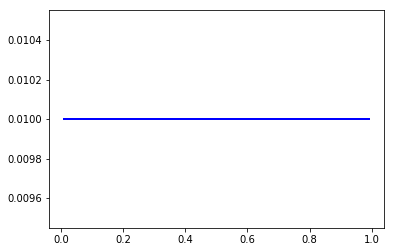

In [11]:
N = 100
p = numpy.linspace(.01, .99, num=N)
pp = [1./N] * N
pyplot.plot(p, pp, linewidth=2, color='blue')

Next, we need to compute the likelihood. The likelihood is the probability of the data given the parameter, $P(X|p)$. We can view the observation of each driver as distracted or not as a Bernoulli trial, so we will use the Binomial distribution. 

The code in the cell below computes and plots the Binomial likelihood for the distracted driver data. This calculation is performed for each value of $p$ we are  sampling. Execute this code and examine the results.

Text(0,0.5,'Likelihood')

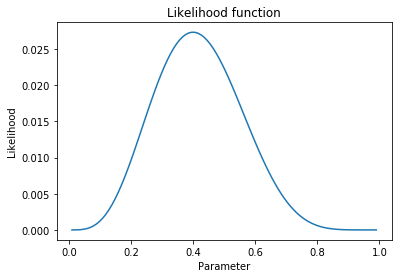

In [12]:
def likelihood(p, data):
    k = sum(data)
    N = len(data)
    # Compute Binomial likelihood
    l = scipy.special.comb(N, k) * p**k * (1-p)**(N-k)
    # Normalize the likelihood to sum to unity
    return l/sum(l)

l = likelihood(p, distracted)
pyplot.plot(p, l)
pyplot.title('Likelihood function')
pyplot.xlabel('Parameter')
pyplot.ylabel('Likelihood')

Now that we have a prior and a likelihood we are in a position to compute the posterior distribution of the parameter $p$, $P(p|X)$. The code in the cell below computes and plots the posterior, given the prior and likelihood.

***
<span style="color: magenta;">**Warning!**</span>  The computational methods used in this notebook are simplified for the purpose of illustration. For real-world problems, computationally efficient code must be used!
***

In [13]:
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

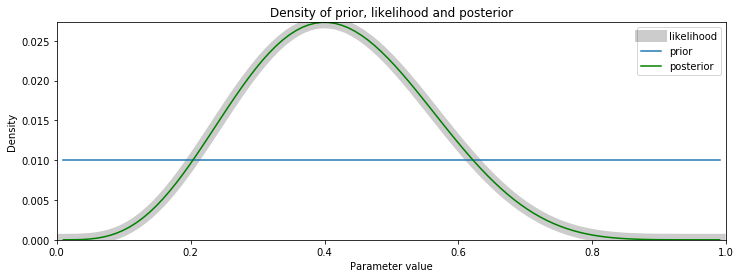

In [14]:
def plot_post(prior, like, post, x):
    maxy = max(max(prior), max(like), max(post))
    pyplot.figure(figsize=(12, 4))
    pyplot.plot(x, like, label='likelihood', linewidth=12, color='black', alpha=.2)
    pyplot.plot(x, prior, label='prior')
    pyplot.plot(x, post, label='posterior', color='green')
    pyplot.ylim(0, maxy)
    pyplot.xlim(0, 1)
    pyplot.title('Density of prior, likelihood and posterior')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.legend()
    
post = posterior(pp, l)
plot_post(pp, l, post, p)

In [15]:
print('Maximum of the prior density = %.3f' % max(pp))
print('Maximum likelihood = %.3f' % max(l))
print('MAP = %.3f' % max(post))

Maximum of the prior density = 0.010
Maximum likelihood = 0.027
MAP = 0.027


Notice that with Uniform prior distribution, the posterior is just the likelihood. This is an important observation. The key point is that the frequentist probabilities are identical to the Bayesian posterior distribution given a Uniform prior.  

### Another prior

Let's try another prior distribution. We will chose the **conjugate prior** of the Binomial distribution which is the Beta distribution. Formally, we can write the Beta distribution:

$$Beta(p |a, b) = \kappa x^{a-1}(1 - x)^{b-1} \\
where,\ \kappa = normalization\ constant$$

The Beta distribution is define on the interval $0 \le Beta(p|a,b) \le 1$. The Beta distribution has two parameters, $a$ and $b$, which determine the shape. To get a feel for the Beta distribution, exectute the code in the cell below which computes 100 examples on a 10x10 grid. 

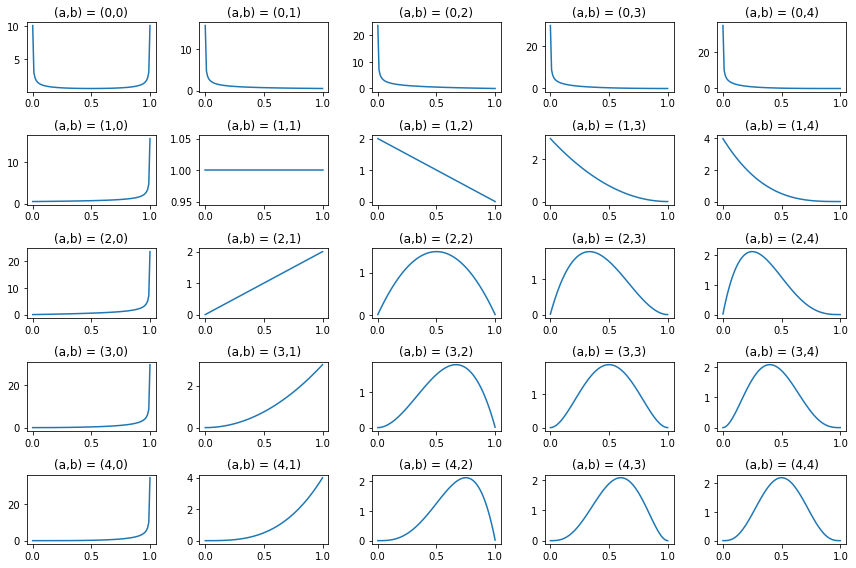

In [16]:
pyplot.figure(figsize=(12, 8))

alpha = [.5, 1, 2, 3, 4]
beta = alpha[:]
x = numpy.linspace(.001, .999, num=100)

for i, (a, b) in enumerate(itertools.product(alpha, beta)):
    pyplot.subplot(len(alpha), len(beta), i+1)
    pyplot.plot(x, scipy.stats.beta.pdf(x, a, b))
    pyplot.title('(a,b) = (%d,%d)' % (a,b))
pyplot.tight_layout()    

You can see from the plots above, that the Beta distribution can take on quite a range of shapes, depending on the parameters. Generally if $a \gt b$ the distribution skews to the rights, if $a \lt b$ to the left, and symetric if $ a = b$.

We still do not know a lot about the behavior of drivers, so we will pick a rather vague or broad Beta distribution as our prior. The code in the cell below uses a symetric prior with $a = 2$ and $b = 2$. Execute this code and examine the result. 

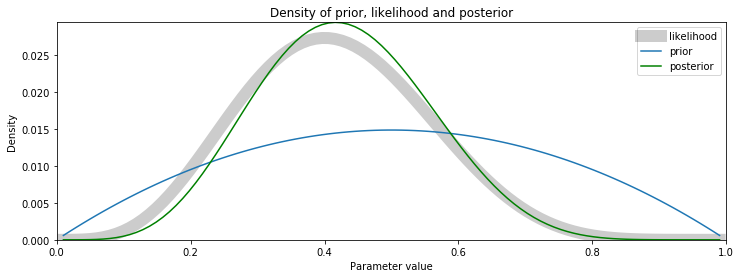

In [17]:
def beta_prior(x, a, b):
    l = scipy.stats.beta.pdf(p, a, b)  # compute likelihood
    return l / l.sum()  # normalize and return

pp = beta_prior(p, 2, 2)
post = posterior(pp, l)
plot_post(pp, l, post, p)

Notice that the mode of the posterior is close to the mode of the likelihood, but has shifted toward the mode of the prior. We call this tendancy of Bayesian posteriors to be shifted toward the prior the **shrinkage property**. The tendancy of the maximum likelihood point of the posterior is said to shrink toward the maximum likelihood point of the prior. 

We can now see that the posterior probability of distracted driving has a rather wide spread. How can we get a more definitive understanding of the probability of distracted driving?

### Adding data to the Bayesian model

Let's say that we observe some more drivers and gather some more data on distracted driving. Additional data will narrow the spread of the posterior distribution. As you might expect, adding more obervations to the model, moves the posterior closser to the likelihood. 

In fact, as data is added to a Bayesian model, the posterior moves toward the likelihood. This property has two important implications:

- The prior matters less as more data is added to a Baysian model.
- Adding data reduces shrinkage.
- The inferences from Baysian and frequentist models tend to converge as data set sizes grow and the posterior approaches the likelihood.

**But, be careful!** With large scale problems with large numbers of parameters you may need enourmous data sets to see the convergance in behavior. 

The code in the cell below adds another 10 observations to our data set. Execute this code and examine the results. How do the likelihood and posterior distributions compare with the case with only 10 data points.

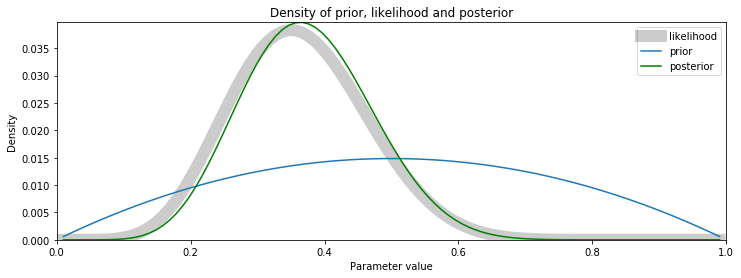

In [18]:
new_drivers = ['no','yes','no','no','no',
          'yes','no','yes','no','no']  # Some new data
new_distracted = [1 if x is 'yes' else 0 for x in new_drivers]

l = likelihood(p, distracted + new_distracted)
post = posterior(pp, l)
plot_post(pp, l, post, p)

## Credible Intervals

A **credible interval** is an interval on the Baysian posterior distribution. The credible interval is sometime called the highest density interval (HDI), or highest posterior density interval (HPI). As an exxample, the 90% credible interval encompases the 90% of the posterior distribution with the highest probability desnsity.  

The credible interval is the Baysian analog of the frequentist confidence interval. However, these two measures are conceptually different. The confidence interval is chosen on the distribution of a test statistic, whereas the credible interval is computed on the posterior distribution of the parameter. For symetric distributions the credible interval can be numerically the same as the confidence interval. However, in the general case, these two quantities can be quite different.  

The code in the cell below, plots the posterior distribution of the parameter of the binomial distribution parameter  pp . The 95% credible interval, or HDI, is also computed and displayed. Execute this code and examine the result. 

***
<span style="color: magenta;">**Warning!**</span> This code assumes a symetric prior distribution, so will not work in the general case. 
***

The 0.950 credible interval is 0.025 to 0.975


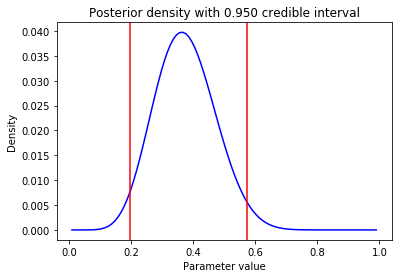

In [19]:
num_samples = 100000
lower_q, upper_q = [.025, .975]

def plot_ci(p, post, num_samples, lower_q, upper_q):
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    samples = numpy.random.choice(p, size=num_samples, replace=True, p=post)
    ci = scipy.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    pyplot.title('Posterior density with %.3f credible interval' % interval)
    pyplot.plot(p, post, color='blue')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.axvline(x=ci[0], color='red')
    pyplot.axvline(x=ci[1], color='red')
    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, lower_q, upper_q))
    
plot_ci(p, post, num_samples, lower_q, upper_q)

### Simulating from the  posterior distribution: forecasting

So far, we have computed the posterior distribution of the probability parameter $p$. But what about the distribution of distracted drivers? We can compute this distribution by simulating from the posterior distribution of $p$. 

The code in the cell below simulates and plots the distribution of distracted drivers. Run this code and examine the results. 

Text(0,0.5,'Probability')

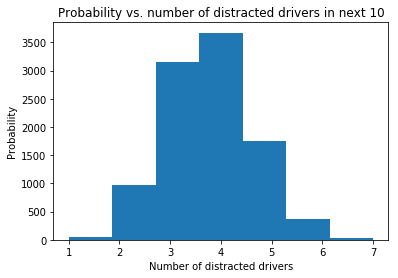

In [20]:
num_cars = 10
num_samples = 10000

counts = (10 * numpy.random.choice(p, size=num_samples, replace=True, p=post)).round()
pyplot.hist(counts, bins=int(max(counts)))
pyplot.title('Probability vs. number of distracted drivers in next %d' % num_cars)
pyplot.xlabel('Number of distracted drivers')
pyplot.ylabel('Probability')

## Comparing Bayesian models

How can we use Bayesian models to compare two distributions? It turns out that we can compare Bayesian models in several ways. In this lesson, we will compute and compare confidence intervals of the posterior distribution of a model parameter. 

For this example, we will compare the posterior distribution of the heights of sons to the heights of the mothers in the Galton Family dataset. As a first step, we will compute and evaluate Bayesian models for the mean heights using a subset of just 25 observations. 

The code in the cell below sub-samples the Galton family data and then plots histogram of the heights of sons and mothers. Execute this code and examine the results.

In [21]:
families = pandas.read_csv('https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/GaltonFamilies.csv', 
                           index_col=0)
families.head()

,father,mother,midparentHeight,children,childNum,gender,childHeight
family,,,,,,,
001,78.5,67.0,75.43,4,1,male,73.2
001,78.5,67.0,75.43,4,2,female,69.2
001,78.5,67.0,75.43,4,3,female,69.0
001,78.5,67.0,75.43,4,4,female,69.0
002,75.5,66.5,73.66,4,1,male,73.5


Mean of heights: 67.7


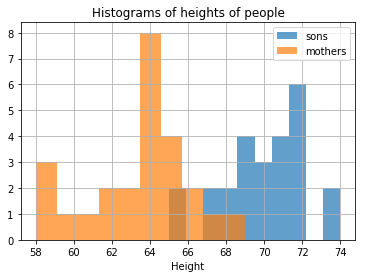

In [22]:
num_samples = 25
male = families[families.gender == 'male'].sample(n=num_samples)

pyplot.title('Histograms of heights of people')
male.childHeight.hist(label='sons', bins=10, alpha=.7)
male.mother.hist(label='mothers', bins=10, alpha=.7)
pyplot.xlabel('Height')
pyplot.legend()

mean_height = numpy.concatenate([male.mother, male.father, male.childHeight,]).mean()
print('Mean of heights: %.1f' % mean_height)

To perform this analysis, we need to select a prior distribution and compute the likelihood. First, we will address the likelihood. 

For these data, we will use a Normal likelihood. For a sample $X = {x_1, x_2, \ldots, x_n}$, we can write the likelihood as:

$$
P(X | u, \sigma) = \bigg(\frac{1}{2 \pi \sigma^2} \bigg)^{\frac{n}{2}} exp \Bigg[ -\frac{1}{2 \sigma^2}  \Bigg( \sum_{i = 1}^n (x_i - \bar{x})^2 + n(\bar{x} - \mu)^2 \Bigg) \Bigg] \\
ignoring\ constants\ and\ normalization\\
\propto exp \bigg( -\frac{n(\bar{x} - \mu)^2}{2 \sigma^2} \bigg) 
$$

To simplify the computations here, we will only estimate the posterior distribution of the mean. We will use a fixed empirical estimate of the standard deviation. A more complete analysis will also estimate the posterior distribution of the standard deviation.

Mean = 69.988, Standard deviation = 2.285


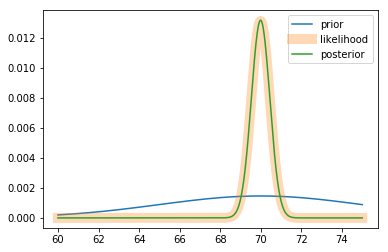

In [23]:
N = 1000
p = numpy.linspace(60, 75, num=N)

pp = scipy.stats.norm.pdf(p, loc=male.childHeight.mean(), scale=5)
pp = pp / pp.sum() # normalize

def comp_like(p, x): 
    variance = numpy.std(x)**2 # sigmasqr
    x_mean = numpy.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, numpy.std(x)))
    n = len(x)
    l = numpy.exp(-n * numpy.square(x_mean - p) / (2 * variance))
    return l / l.sum()

like_son = comp_like(p, male.childHeight)
post_son = posterior(pp, like_son)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_son, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_son, label='posterior')
pyplot.legend()

The code in the cell below computes the posterior distribution of the heights of the mothers. Run this code and examine the results. How do these results differ from the results for the hights of the sons?

Mean = 63.448, Standard deviation = 2.590


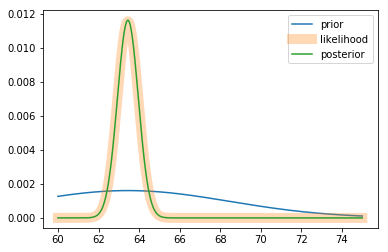

In [24]:
pp_mom = scipy.stats.norm.pdf(p, loc=male.mother.mean(), scale=5)
pp_mom = pp_mom / pp_mom.sum() # normalize

like_mom = comp_like(p, male.mother)
post_mom = posterior(pp_mom, like_mom)

pyplot.plot(p, pp_mom, label='prior')
pyplot.plot(p, like_mom, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_mom, label='posterior')
pyplot.legend()

To compare the posterior distributions of the mean hights of the sons to the distribution of the mean heights of the mothers, we compute and compare the confidence intervals. 

Run the code  in the cell below which computes and plots the confidence intervals for the mean heights of the sons. 

The 0.950 credible interval is 0.025 to 0.975


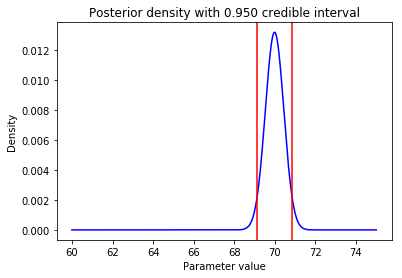

In [25]:
num_samples = 100000

plot_ci(p, post_son, num_samples, lower_q=.025, upper_q=.975)

Next, compute and plot the posterior distribution and CIs of the mean of the heights of the mothers.  

The 0.950 credible interval is 0.025 to 0.975


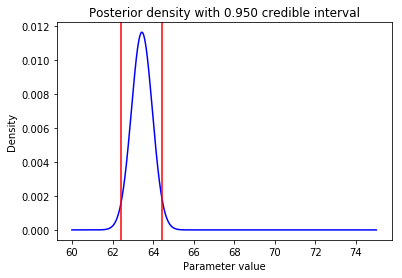

In [26]:
plot_ci(p, post_mom, num_samples, lower_q=.025, upper_q=.975)

Examine the CIs for these posterior distributions. Are the distributions of the mean heights of sons and mothers significantly different?  

***
## Your turn 2
Try the variations on the foregoing Bayesian analysis.

1. The foregoing Bayesian analysis was performed with just 25 data points. Rerun this analysis with with 250 data points. How do the posterior distributions computed with the 250 data points compare to those computed with 25 data points? 
2. Perform the same analysis, except comparing the distributions of heights of sons and heights of fathers. 

**Important!:** Use another variable name for the likelihood and posterior for this exercise. 
***

In [ ]:
# complete the other side of the =
# use 250 data points
num_samples = 
male_samples = 

like_son_250 = 
post_son_250 = 

like_mom_250 = 
post_mom_250 = 

# Plotting the Posterior distributions and CIs
plot_ci(p, post_son_250, num_samples, lower_q=.025, upper_q=.975)
plot_ci(p, post_mom_250, num_samples, lower_q=.025, upper_q=.975)

### Simulation from the posterior distribution

Once we have a posterior distribution for parameters we can simulate from this distribution. The simulation consists of taking a number of random draws from the posterior parameter distribution and computing the posterior distribution of the data values. 

There are a number of reasons why you might want to simulate from the posterior distribution of data values.

- Test the model against the data.
- Compute forecasts of the dependent (label) variable from the model.

The code in the cell below computes the posterior distribution of the heights of sons. This is done by computing the distribution of height based on realizations of the parameter (the mean) from the posterior distribution. The density distribution of the simulated heights is ploted along with the histogram of the original data. Execute this code and examine the results.

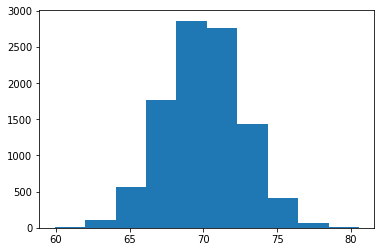

In [27]:
def sim_height(n, sigma, p, post):
    # create the probability-weighted random sample of values of the mean height
    mu = numpy.random.choice(p, size=n, replace=True, p=post)
    return scipy.stats.norm.rvs(loc=mu, scale=sigma, size=n)

_ = pyplot.hist(sim_height(10000, sigma=2.616329, p=p, post=post_son))

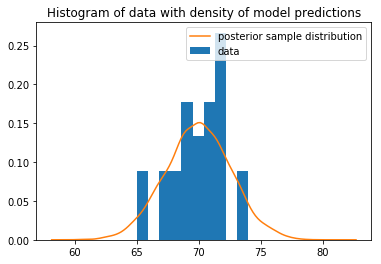

In [28]:
def plot_dist(n, post, dat):
    pyplot.hist(dat, normed=True, label='data')
    seaborn.kdeplot(post, label='posterior sample distribution')
    pyplot.title('Histogram of data with density of model predictions')

sim_vals = sim_height(10000, sigma=2.616329, p=p, post=post_son)
plot_dist(10000, sim_vals, male.childHeight)

Examine this chart. How well does the density of the posterior value distribution match the histogram of the original data values? Does the density of the posterior value distribtion deviate from Normal? 

***
## Your turn 3
Use the model you computed with 250 data values to create a plot like the one above. Examine these results and compare them to the results obtained with the model created with only 25 data values. Which posterior density function appears to represent the data better and why? Does the density deviate from Normal?
***

In [29]:
# complete the other side of the =
sim_vals_250 = 

# Plot the distribution
plot_dist(10000, sim_vals_250, male.childHeight)

SyntaxError: invalid syntax (<ipython-input-29-9d73a09c08f6>, line 2)

## Summary

In this lesson, you have explored the following concepts:

1. Application of Bayes Theorem.
2. Computation of marginal distribtuions.
3. Selection and computation of prior distributions.
4. Selection and computation of likelihoods.
5. Computation of posterior distributions.
6. Computation and comparison of credible intervals. 
7. Simulation of data values from posterior distribution of model parameters.

<div id="reminder" style="border-radius: 5px; background-color:#f5f5f5;" >
<h3>Reminder</h3>
<p>Use this notebook to answer the quiz questions related to the <b>Your Turn</b> sections.<p>
</div>